In [1]:
import pandas as pd
import numpy as np
import random
from datetime import timedelta
import seaborn as sns

In [2]:
import boto3
import matplotlib.pyplot as plt

In [3]:
s3 = boto3.client('s3')

In [5]:
file = s3.get_object(Bucket='sf-ems-analysis', Key='woring_3h_lim.csv')

In [6]:
df = pd.read_csv(file['Body'])

In [10]:
df.set_index(keys=df['Received DtTm'], inplace = True)

In [12]:
df.drop(columns=['Received DtTm'], inplace = True)

In [13]:
df

,Call Type
Received DtTm,
2010-01-01 00:00:00,116
2010-01-01 03:00:00,48
2010-01-01 06:00:00,25
2010-01-01 09:00:00,37
2010-01-01 12:00:00,42
...,...
2019-12-31 09:00:00,60
2019-12-31 12:00:00,81
2019-12-31 15:00:00,63


In [ ]:
#df.set_index(keys=df['Received DtTm'], inplace=True)

In [ ]:
#df.sort_index(inplace=True)
#df

In [ ]:
#df_no_dup = df.drop_duplicates(subset=['Call Number'])

In [ ]:
#break up by neighborhood
neighborhoods = {}
for i, j in enumerate(df_no_dup['Neighborhooods - Analysis Boundaries'].unique()):
    neighborhoods[i] = j

neigh_df = {}    
for k, l in enumerate(df_no_dup['Neighborhooods - Analysis Boundaries'].unique()):
    neigh_df[k] = df_no_dup[df_no_dup['Neighborhooods - Analysis Boundaries'] == l]

In [ ]:
#working_hours = df_no_dup['Call Type'].resample('3H').count()

In [ ]:
#working_hours.to_csv('3H_incre.csv')

In [ ]:
#df_no_dup.to_csv('EMS_no_dup.csv')

In [ ]:
#s3.upload_file(Filename='3H_incre.csv',
#              Bucket='sf-ems-analysis',
#              Key='3H_incre.csv')

In [ ]:
#s3.upload_file(Filename='EMS_no_dup.csv',
#              Bucket='sf-ems-analysis',
#              Key='EMS_no_dup.csv')

In [ ]:
#np.where(working_hours.index.year == 2020)[0]

In [ ]:
#np.where(working_hours.index.year == 2009)[0]

In [ ]:
#working_hours_lim = working_hours[28401:57617]

In [ ]:
#working_hours_lim.sort_values(ascending=False)[:20]

In [ ]:
#working_hours_lim.to_csv('working_3h_lim.csv')

In [ ]:
#s3.upload_file(Filename='working_3h_lim.csv',
#              Bucket='sf-ems-analysis',
#              Key='woring_3h_lim.csv')

## SARIMAX

In [8]:
from scipy import signal
from scipy import stats

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX

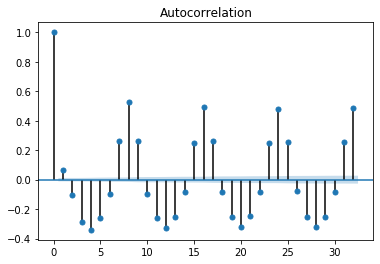

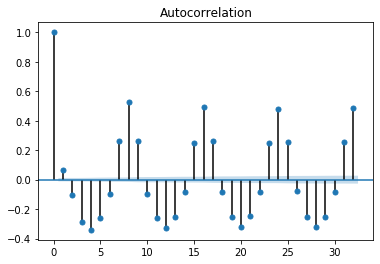

In [14]:
sm.graphics.tsa.plot_acf(df.diff()[2:], lags=32, alpha = 0.05)

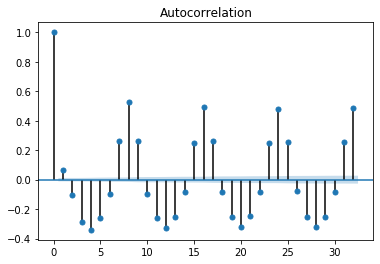

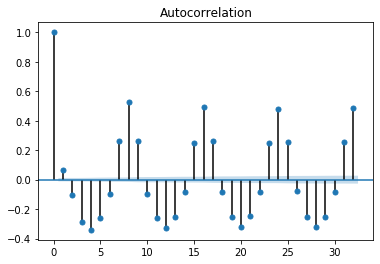

In [15]:
sm.graphics.tsa.plot_acf(df.diff()[2:], lags=32, alpha = 0.05)

In [16]:
model = SARIMAX(df, order=(0,1,0), seasonal_order=(2,1,1,12), trend='c')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  % freq, ValueWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  % freq, ValueWarning)


In [17]:
model_fit = model.fit()

In [18]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Call Type   No. Observations:                29216
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 12)   Log Likelihood             -115255.831
Date:                              Thu, 27 Aug 2020   AIC                         230521.662
Time:                                      16:31:28   BIC                         230563.072
Sample:                                  01-01-2010   HQIC                        230534.966
                                       - 12-31-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    9.58e-06      0.000      0.045      0.964      -0.000       0.000
ar.S.L12      -0.3324      0.005    -66.966      0.000      -0.342      -0.323
ar.S.L24       0.2788      0.005     54.311      0.000       0.269       0.289
ma.S.L12      -0.9976      0.000  -2018.218      0.000      -0.999      -0.997
sigma2       156.5144      0.938    166.830      0.000     154.676     158.353
===================================================================================
Ljung-Box (Q):                     8845.88   Jarque-Bera (JB):              4042.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
model1 = SARIMAX(df, order=(0,1,0), seasonal_order=(3,1,2,12), trend='c')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  % freq, ValueWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  % freq, ValueWarning)


In [22]:
model_fit1 = model1.fit()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [23]:
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                               Call Type   No. Observations:                29216
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2], 12)   Log Likelihood             -111528.391
Date:                                 Thu, 27 Aug 2020   AIC                         223070.782
Time:                                         17:01:17   BIC                         223128.756
Sample:                                     01-01-2010   HQIC                        223089.407
                                          - 12-31-2019                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      1.509      0.131   -8.15e-05       0.001
ar.S.L12      -0.9708      0.006   -157.496      0.000      -0.983      -0.959
ar.S.L24      -0.0430      0.008     -5.304      0.000      -0.059      -0.027
ar.S.L36      -0.0659      0.006    -10.930      0.000      -0.078      -0.054
ma.S.L12      -0.0515      0.003    -17.148      0.000      -0.057      -0.046
ma.S.L24      -0.9479      0.003   -314.016      0.000      -0.954      -0.942
sigma2       122.0604      0.636    191.867      0.000     120.814     123.307
===================================================================================
Ljung-Box (Q):                     4558.06   Jarque-Bera (JB):             13617.61
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
df.index = pd.to_datetime(df.index)


In [35]:
np.where(df.index.year == 2016)

(array([17528, 17529, 17530, ..., 20453, 20454, 20455]),)

In [36]:
np.where(df.index.year == 2018)

(array([23376, 23377, 23378, ..., 26293, 26294, 26295]),)

In [140]:
model2 = SARIMAX(df[19352:25192], order=(0,1,0), seasonal_order=(3,1,1,8), trend='c')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency 3H will be used.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency 3H will be used.



In [141]:
model_fit2 = model2.fit()

In [142]:
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           Call Type   No. Observations:                 5840
Model:             SARIMAX(0, 1, 0)x(3, 1, [1], 8)   Log Likelihood              -22396.672
Date:                             Thu, 27 Aug 2020   AIC                          44805.343
Time:                                     21:21:34   BIC                          44845.369
Sample:                                 08-16-2016   HQIC                         44819.263
                                      - 08-15-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.244e-05      0.001     -0.042      0.966      -0.002       0.001
ar.S.L8        0.0485      0.012      4.020      0.000       0.025       0.072
ar.S.L16      -0.0242      0.013     -1.869      0.062      -0.050       0.001
ar.S.L24      -0.0457      0.013     -3.623      0.000      -0.070      -0.021
ma.S.L8       -0.9986      0.004   -283.840      0.000      -1.005      -0.992
sigma2       126.0051      1.809     69.639      0.000     122.459     129.551
===================================================================================
Ljung-Box (Q):                     1129.92   Jarque-Bera (JB):               483.16
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [143]:
y_hat = model_fit2.predict(len(df[19352:25192]), len(df[19352:25192])+56)

In [144]:
measure_rmse(actual['y'], y_hat[:-1])

11.856563639077532

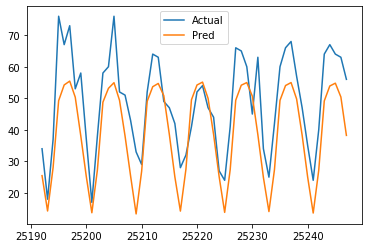

In [139]:
plt.plot(actual.index, actual['y'])
plt.plot(actual.index, y_hat[:-1])
plt.legend(['Actual','Pred'])

In [44]:
df[17528:26296]

,Call Type
Received DtTm,
2016-01-01 00:00:00,147
2016-01-01 03:00:00,55
2016-01-01 06:00:00,42
2016-01-01 09:00:00,63
2016-01-01 12:00:00,51
...,...
2018-12-31 09:00:00,64
2018-12-31 12:00:00,63
2018-12-31 15:00:00,84


In [57]:
yhat = model_fit2.predict(len(df[17528:26296]), len(df[17528:26296])+24)

## Prophet

In [ ]:
!conda install -c conda-forge fbprophet --yes

In [61]:
from fbprophet import Prophet

In [62]:
m = Prophet()

In [66]:
df_ds = df.reset_index(level=0)
df_ds.columns = ['ds','y']


AttributeError: 'DataFrame' object has no attribute 'indo'

In [68]:
df_ds[df_ds['ds'] == '2016-08-16 00:00:00']

,ds,y
19352,2016-08-16,29


In [69]:
df_ds[df_ds['ds'] == '2018-08-16 00:00:00']

,ds,y
25192,2018-08-16,34


In [72]:
m.fit(df_ds.iloc[19352:25192])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [73]:
future=m.make_future_dataframe(periods=56, freq='3H')
future

,ds
0,2016-08-16 00:00:00
1,2016-08-16 03:00:00
2,2016-08-16 06:00:00
3,2016-08-16 09:00:00
4,2016-08-16 12:00:00
...,...
5891,2018-08-22 09:00:00
5892,2018-08-22 12:00:00
5893,2018-08-22 15:00:00
5894,2018-08-22 18:00:00


In [74]:
forecast = m.predict(future)

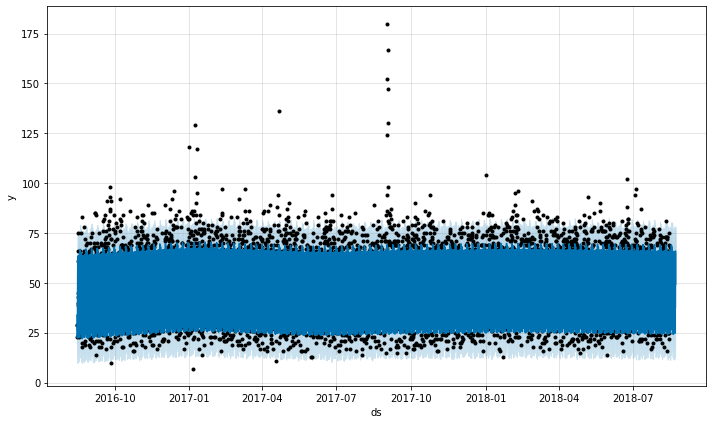

In [169]:
fig1 = m.plot(forecast)
plt.savefig('2yrprophet.png')

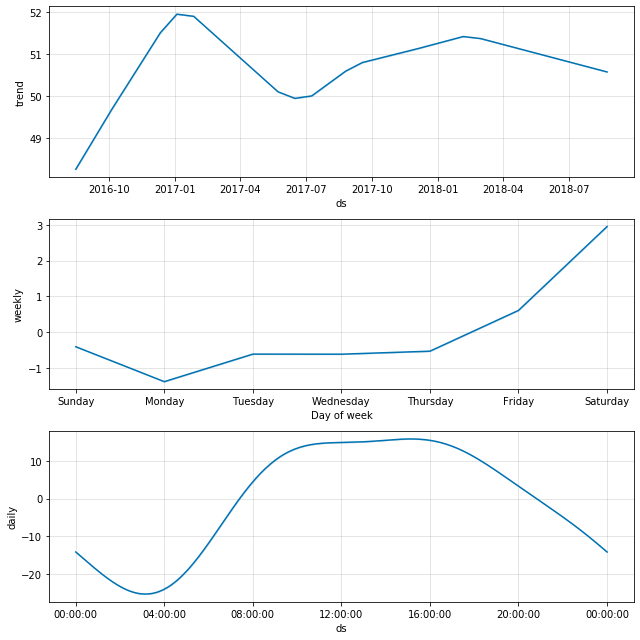

In [76]:
fig2 = m.plot_components(forecast)

In [81]:
df_ds.iloc[19352:25192]['y'].idxmax()

22405

In [83]:
df_ds.iloc[22401:22409]

,ds,y
22401,2017-09-01 03:00:00,27
22402,2017-09-01 06:00:00,43
22403,2017-09-01 09:00:00,94
22404,2017-09-01 12:00:00,152
22405,2017-09-01 15:00:00,180
22406,2017-09-01 18:00:00,124
22407,2017-09-01 21:00:00,86
22408,2017-09-02 00:00:00,58


In [84]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-08-16 00:00:00,48.268856,21.426373,46.185365,48.268856,48.268856,-14.748553,-14.748553,-14.748553,-14.134014,-14.134014,-14.134014,-0.614540,-0.614540,-0.614540,0.0,0.0,0.0,33.520303
1,2016-08-16 03:00:00,48.272424,9.794179,33.980549,48.272424,48.272424,-25.897668,-25.897668,-25.897668,-25.249472,-25.249472,-25.249472,-0.648196,-0.648196,-0.648196,0.0,0.0,0.0,22.374755
2,2016-08-16 06:00:00,48.275991,23.958626,47.635367,48.275991,48.275991,-12.491116,-12.491116,-12.491116,-11.803374,-11.803374,-11.803374,-0.687742,-0.687742,-0.687742,0.0,0.0,0.0,35.784875
3,2016-08-16 09:00:00,48.279558,45.908136,70.321577,48.279558,48.279558,9.436170,9.436170,9.436170,10.157931,10.157931,10.157931,-0.721760,-0.721760,-0.721760,0.0,0.0,0.0,57.715728
4,2016-08-16 12:00:00,48.283125,51.073426,74.369709,48.283125,48.283125,14.146551,14.146551,14.146551,14.887602,14.887602,14.887602,-0.741051,-0.741051,-0.741051,0.0,0.0,0.0,62.429677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5891,2018-08-22 09:00:00,50.579481,48.739487,72.864717,50.579481,50.579787,9.704824,9.704824,9.704824,10.157931,10.157931,10.157931,-0.453107,-0.453107,-0.453107,0.0,0.0,0.0,60.284304
5892,2018-08-22 12:00:00,50.578916,52.604177,77.935242,50.578916,50.579313,14.458153,14.458153,14.458153,14.887602,14.887602,14.887602,-0.429449,-0.429449,-0.429449,0.0,0.0,0.0,65.037070
5893,2018-08-22 15:00:00,50.578352,54.034808,77.407345,50.578351,50.578794,15.385362,15.385362,15.385362,15.814660,15.814660,15.814660,-0.429298,-0.429298,-0.429298,0.0,0.0,0.0,65.963714
5894,2018-08-22 18:00:00,50.577788,48.630440,73.069431,50.577729,50.578530,10.627231,10.627231,10.627231,11.078578,11.078578,11.078578,-0.451347,-0.451347,-0.451347,0.0,0.0,0.0,61.205019


In [105]:
from math import sqrt
from sklearn.metrics import mean_squared_error
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

In [146]:
actual= df_ds.iloc[25192-56:25192+56]

In [162]:
actual

,ds,y
25136,2018-08-09 00:00:00,34
25137,2018-08-09 03:00:00,24
25138,2018-08-09 06:00:00,39
25139,2018-08-09 09:00:00,55
25140,2018-08-09 12:00:00,70
...,...,...
25243,2018-08-22 09:00:00,64
25244,2018-08-22 12:00:00,67
25245,2018-08-22 15:00:00,64
25246,2018-08-22 18:00:00,63


In [147]:
yhat = forecast.iloc[-112:]


In [106]:
measure_rmse(actual['y'], yhat['yhat'])

7.2805292401834825

In [98]:
len(actual)

56

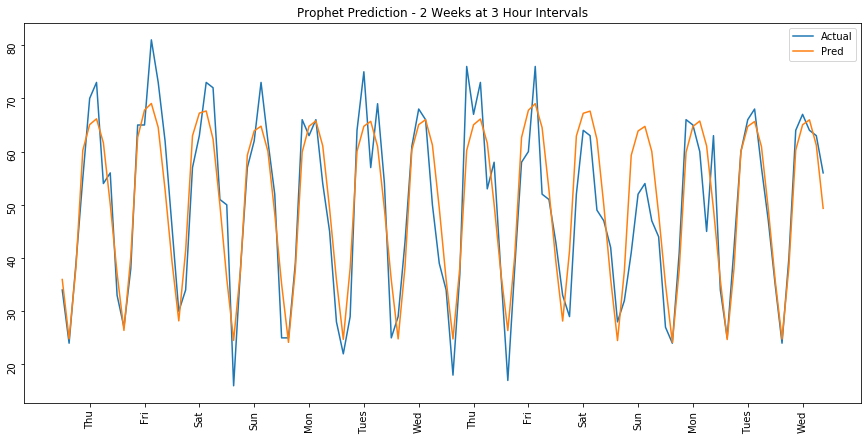

In [168]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(actual.index, actual['y'])
ax.plot(actual.index, yhat['yhat'])
ax.tick_params(labelrotation=90)
plt.legend(['Actual','Pred'])
plt.xticks([x for x in range(25140,25252, 8)], ['Thu','Fri','Sat','Sun','Mon','Tues','Wed']*2)
ax.set_title('Prophet Prediction - 2 Weeks at 3 Hour Intervals')
plt.savefig('Proph_pred_week.png')

In [112]:
np.mean(actual['y'])

48.714285714285715

In [152]:
df_ds.iloc[25140]

ds    2018-08-09 12:00:00
y                      70
Name: 25140, dtype: object

In [167]:
df_ds[df_ds['y'] > 125]

,ds,y
2920,2011-01-01 00:00:00,146
5840,2012-01-01 00:00:00,194
8768,2013-01-01 00:00:00,139
11688,2014-01-01 00:00:00,161
14442,2014-12-11 06:00:00,134
14608,2015-01-01 00:00:00,148
17528,2016-01-01 00:00:00,147
20515,2017-01-08 09:00:00,129
21339,2017-04-21 09:00:00,136
22404,2017-09-01 12:00:00,152


### Using previous day as prediction

In [145]:
measure_rmse(actual['y'][8:], actual['y'][:-8])

8.757139944068497

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
